In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.Series.__unicode__ = pd.Series.to_string

import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib.pyplot as plt
# %matplotlib inline
import plotly.plotly as py
#plotly.offline doesn't push your charts to the clouds
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.offline.init_notebook_mode()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open("/content/drive/My Drive/optum/csv/organizations.csv",
          mode='r',
          encoding='utf-8') as f:
  org = f.read()

In [ ]:
data = pd.read_csv("/content/drive/My Drive/optum/csv/organizations.csv")

In [ ]:
data.head()

,Id,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON,PHONE,REVENUE,UTILIZATION
0,ef58ea08-d883-3957-8300-150554edc8fb,HEALTHALLIANCE HOSPITALS INC,60 HOSPITAL ROAD,LEOMINSTER,MA,01453,42.520838,-71.770876,9784662000,198002.28,1557
1,69176529-fd1f-3b3f-abce-a0a3626769eb,MOUNT AUBURN HOSPITAL,330 MOUNT AUBURN STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,6174923500,288569.17,2296
2,5e765f2b-e908-3888-9fc7-df2cb87beb58,STURDY MEMORIAL HOSPITAL,211 PARK STREET,ATTLEBORO,MA,02703,41.931653,-71.294503,5082225200,287355.03,2287
3,f1fbcbfb-fcfa-3bd2-b7f4-df20f1b3c3a4,LAWRENCE GENERAL HOSPITAL,ONE GENERAL STREET,LAWRENCE,MA,01842,42.700273,-71.161357,9786834000,163386.98,1327
4,e002090d-4e92-300e-b41e-7d1f21dee4c6,CAMBRIDGE HEALTH ALLIANCE,1493 CAMBRIDGE STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,6176652300,406053.19,3199


In [ ]:
data.describe()

,LAT,LON,REVENUE,UTILIZATION
count,1119.000000,1119.000000,1119.000000,1119.000000
mean,42.262605,-71.351316,15496.285067,127.004468
std,0.285835,0.618097,47753.176484,381.564308
min,41.293416,-73.361473,0.000000,1.000000
25%,42.124204,-71.540489,3616.480000,28.000000
50%,42.323853,-71.144319,5295.560000,43.000000
75%,42.452752,-71.018253,8395.400000,69.000000
max,42.851284,-69.969034,595246.770000,4828.000000


In [ ]:
#column names
data.columns

Index(['Id', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'LAT', 'LON', 'PHONE',
       'REVENUE', 'UTILIZATION'],
      dtype='object')

In [ ]:
# Display the counts of each value in the ADDRESS column
data['ADDRESS'].value_counts()


1180 BEACON ST      6
199 REEDSDALE RD    5
955 MAIN ST         5
3 WOODLAND RD       4
1 BROOKLINE PL      3
                   ..
43 HIGH ST          1
225 ESSEX ST        1
1054 COUNTY ST      1
19 PINE RD          1
706 ROGERS ST       1
Name: ADDRESS, Length: 1006, dtype: int64

In [ ]:
# Display the counts of each value in the CITY column
data['CITY'].value_counts()


BROOKLINE           32
CAMBRIDGE           29
BOSTON              25
MILTON              18
SOMERVILLE          17
                    ..
NEWTON CENTER        1
NORTH BROOKFIELD     1
RANDOLPH             1
W BARNSTABLE         1
RICHMOND             1
Name: CITY, Length: 317, dtype: int64

In [ ]:
# Display the counts of each value in the STATE column
data['STATE'].value_counts()


MA    1119
Name: STATE, dtype: int64

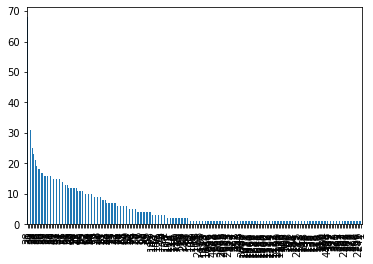

In [ ]:
data['UTILIZATION'].value_counts().plot.bar()

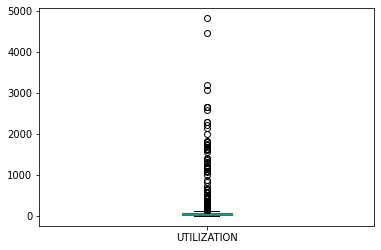

In [ ]:
data['UTILIZATION'].plot.box()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


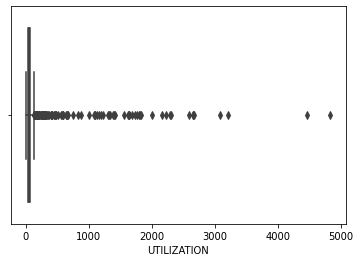

In [ ]:
sns.boxplot(data['UTILIZATION'])

In [ ]:
data[data['CITY']=='CAMBRIDGE'].head()

,Id,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON,PHONE,REVENUE,UTILIZATION
1,69176529-fd1f-3b3f-abce-a0a3626769eb,MOUNT AUBURN HOSPITAL,330 MOUNT AUBURN STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,6174923500,288569.17,2296
4,e002090d-4e92-300e-b41e-7d1f21dee4c6,CAMBRIDGE HEALTH ALLIANCE,1493 CAMBRIDGE STREET,CAMBRIDGE,MA,02138,42.375967,-71.118275,6176652300,406053.19,3199
180,6283a0f2-98cd-30e3-a92d-620a208e254c,PCP13525,307 CONCORD AVE,CAMBRIDGE,MA,02138-1207,42.376043,-71.118680,617-497-1484,5295.56,41
207,5b886ab0-eee4-3253-973e-7419afc5a2ce,PCP17517,203 ALLSTON ST,CAMBRIDGE,MA,02139-3917,42.376043,-71.118680,617-492-3868,3358.16,26
216,4b562cab-70a7-3a46-bb2c-a1d4b85fdba6,PCP19106,328 BROADWAY,CAMBRIDGE,MA,02139-1840,42.376043,-71.118680,617-661-3113,8912.04,69


In [ ]:
# Average REVENUE for ORGANISATIONS by CITY
for i in data['CITY'].unique():
    print("CITY: {}\nAVERAGE REVENUE: ${}\n\n".format(i,data[data['CITY']==i]['REVENUE'].mean()))

CITY: LEOMINSTER
AVERAGE REVENUE: $103069.6800000022


CITY: CAMBRIDGE
AVERAGE REVENUE: $28940.74344827511


CITY: ATTLEBORO
AVERAGE REVENUE: $52477.685000000165


CITY: LAWRENCE
AVERAGE REVENUE: $28138.36857142895


CITY: HYANNIS
AVERAGE REVENUE: $50832.20600000104


CITY: NORTHAMPTON
AVERAGE REVENUE: $103883.38500000234


CITY: GREENFIELD
AVERAGE REVENUE: $22241.332500000353


CITY: BOSTON
AVERAGE REVENUE: $17145.20760000006


CITY: SOUTHBRIDGE
AVERAGE REVENUE: $93550.55500000196


CITY: FALL RIVER
AVERAGE REVENUE: $49292.05181818243


CITY: HOLYOKE
AVERAGE REVENUE: $31282.547499999422


CITY: NEWBURYPORT
AVERAGE REVENUE: $40383.986666667326


CITY: PALMER
AVERAGE REVENUE: $136237.92000000275


CITY: BEVERLY
AVERAGE REVENUE: $30072.74833333386


CITY: SALEM
AVERAGE REVENUE: $24842.62000000044


CITY: BRIGHTON
AVERAGE REVENUE: $11948.473636363673


CITY: PITTSFIELD
AVERAGE REVENUE: $58470.69750000119


CITY: MARLBOROUGH
AVERAGE REVENUE: $43358.97000000087


CITY: BROCKTON
AVERAGE REVE

In [ ]:
#mean of revenue and utilization BY CITY
data.groupby('CITY').mean()

,LAT,LON,REVENUE,UTILIZATION
CITY,,,,
ABINGTON,42.119967,-70.957211,6070.520000,47.000000
ACTON,42.483953,-71.438495,6135.100000,48.000000
ACUSHNET,41.718217,-70.901151,21311.400000,165.000000
ADAMS,42.625560,-73.119828,5080.293333,40.000000
AGAWAM,42.064731,-72.653477,4197.700000,33.000000
...,...,...,...,...
WORTHINGTON,42.397559,-72.943392,13303.480000,103.000000
WRENTHAM,42.052671,-71.356858,8007.920000,62.000000
West Springfield,42.139397,-72.623820,56391.100000,448.000000


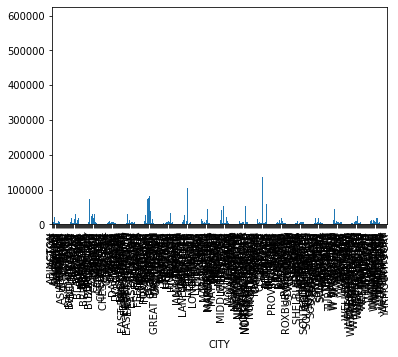

In [ ]:
group = data.groupby('CITY').mean()
group['REVENUE'].plot.bar()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


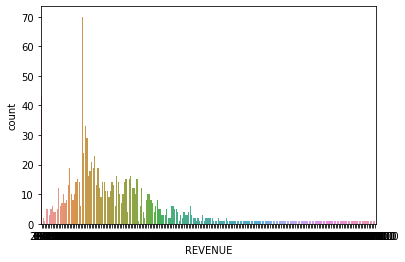

In [ ]:
dataround = data.copy()
# round the REVENUE variable to 0 or 1 (nearest)
dataround['REVENUE'] = dataround['REVENUE'].round(-1)
sns.countplot(dataround['REVENUE'])